<b><font size="3">Importing Libraries</font></b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
os.environ["OMP_NUM_THREADS"] = '1'

from sklearn.decomposition import PCA

<b><font size="3">Importing Dataset</font></b>

In [2]:
green_data = pd.read_csv('greenhouse_inventory.csv')

<b><font size="3">Reading the Dataset</font></b>

In [3]:
print("The data set has {} rows and {} columns.".format(green_data.shape[0],green_data.shape[1]))

The data set has 240 rows and 5 columns.


In [4]:
green_data.head()

,Country,Year,CO2 Value,CH4 Value,N2O Value
0,Canada,2019,582389.61,97761.48,36602.29
1,Canada,2018,579470.37,98663.87,36852.83
2,Canada,2017,569360.44,98584.81,35569.03
3,Canada,2016,559566.96,98769.62,36164.24
4,Canada,2015,573061.38,102246.02,35306.39


In [5]:
green_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    240 non-null    object 
 1   Year       240 non-null    int64  
 2   CO2 Value  240 non-null    float64
 3   CH4 Value  240 non-null    float64
 4   N2O Value  240 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.5+ KB


In [6]:
green_data.describe()

,Year,CO2 Value,CH4 Value,N2O Value
count,240.000000,2.400000e+02,240.000000,240.000000
mean,2009.500000,7.906612e+05,86207.089958,51775.148667
std,5.778332,1.529366e+06,181346.122801,122498.580809
min,2000.000000,2.863430e+03,569.250000,296.020000
25%,2004.750000,4.361384e+04,5339.315000,4389.497500
50%,2009.500000,2.009210e+05,21814.395000,12641.010000
75%,2014.250000,6.238560e+05,60162.292500,30536.677500
max,2019.000000,6.134521e+06,707563.470000,473988.780000


In [7]:
green_data.isnull().any()

Country      False
Year         False
CO2 Value    False
CH4 Value    False
N2O Value    False
dtype: bool

<b><font size="3">Creating Dataplots</font></b>

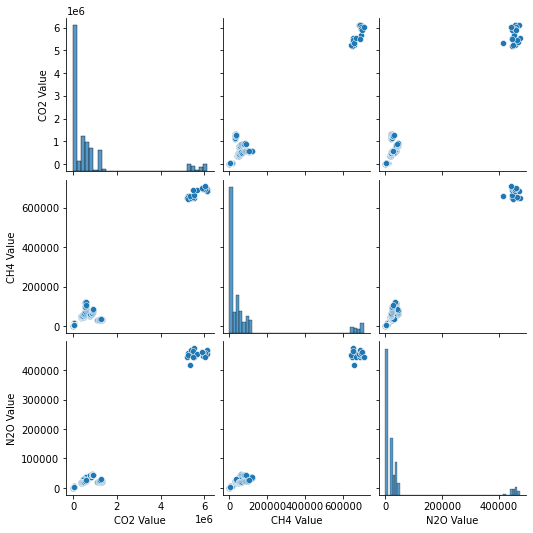

In [8]:
sns.pairplot(green_data.iloc[:,[2,3,4]])

In [9]:
from sklearn.preprocessing import StandardScaler
green_scaler = StandardScaler()
X = green_data.iloc[:,[2,3,4]].values
X = green_scaler.fit_transform(X)

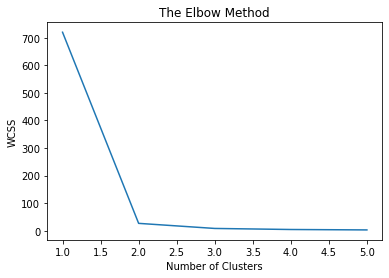

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

<b><font size="3">Creating K-Means Clustering</font></b>

In [11]:
kmeans= KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

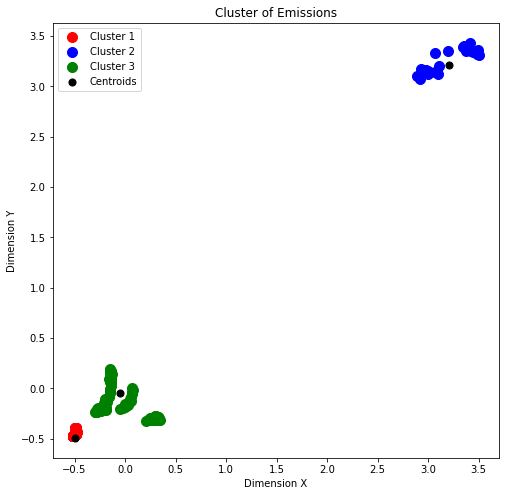

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_means==0,0], X[y_means==0,1], s = 100, c= 'red' ,label = 'Cluster 1')
plt.scatter(X[y_means==1,0], X[y_means==1,1], s = 100, c= 'blue' ,label = 'Cluster 2')
plt.scatter(X[y_means==2,0], X[y_means==2,1], s = 100, c= 'green' ,label = 'Cluster 3')
# plt.scatter(X[y_means==3,0], X[y_means==3,1], s = 100, c= 'yellow' ,label = 'Cluster 4')
# plt.scatter(X[y_means==4,0], X[y_means==4,1], s = 100, c= 'cyan' ,label = 'Cluster 5')
# plt.scatter(X[y_means==5,0], X[y_means==5,1], s = 100, c= 'violet' ,label = 'Cluster 6')
# plt.scatter(X[y_means==6,0], X[y_means==6,1], s = 100, c= 'brown' ,label = 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,0], s = 50, c = 'black', label = 'Centroids')
plt.title('Cluster of Emissions')
plt.xlabel('Dimension X')
plt.ylabel('Dimension Y')
plt.legend()
plt.show()

<b><font size="3">Creating Hierarchical Clustering</font></b>

<function matplotlib.pyplot.show(close=None, block=None)>

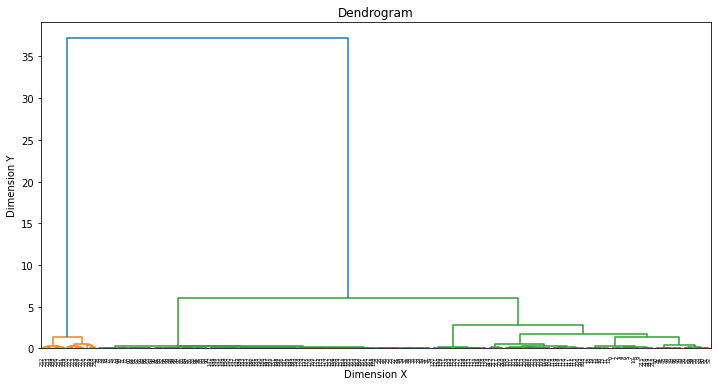

In [13]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Dimension X')
plt.ylabel('Dimension Y')
plt.show

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

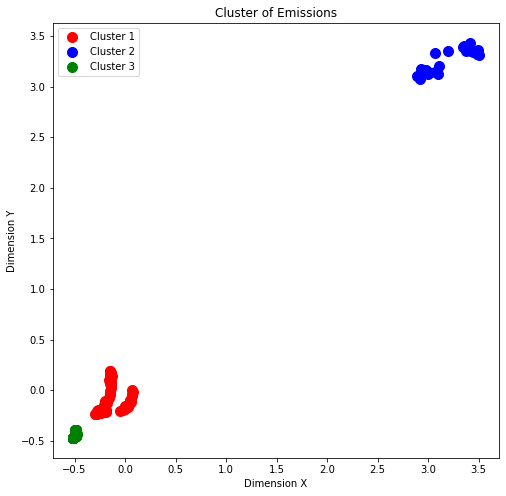

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc==0,0], X[y_hc==0,1], s = 100, c= 'red' ,label = 'Cluster 1')
plt.scatter(X[y_hc==1,0], X[y_hc==1,1], s = 100, c= 'blue' ,label = 'Cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2,1], s = 100, c= 'green' ,label = 'Cluster 3')
# plt.scatter(X[y_hc==3,0], X[y_hc==3,1], s = 100, c= 'yellow' ,label = 'Cluster 4')
# plt.scatter(X[y_hc==4,0], X[y_hc==4,1], s = 100, c= 'cyan' ,label = 'Cluster 5')
# plt.scatter(X[y_hc==5,0], X[y_hc==5,1], s = 100, c= 'violet' ,label = 'Cluster 6')
# plt.scatter(X[y_hc==6,0], X[y_hc==6,1], s = 100, c= 'brown' ,label = 'Cluster 7')
plt.title('Cluster of Emissions')
plt.xlabel('Dimension X')
plt.ylabel('Dimension Y')
plt.legend()
plt.show()

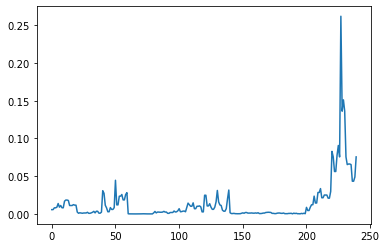

In [16]:
from sklearn.neighbors import NearestNeighbors

neighbours = NearestNeighbors()
distances, indices = neighbours.fit(X).kneighbors(X)

distances = distances[:,1]
dinstances = np.sort(distances, axis = 0)
plt.plot(distances)

<b><font size="3">Creating DBSCAN Clustering</font></b>

In [17]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN (eps=0.25, min_samples=3)
y_dbscan = dbscan.fit_predict(X)

In [18]:
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,
        3,  3,  3,  3,  3

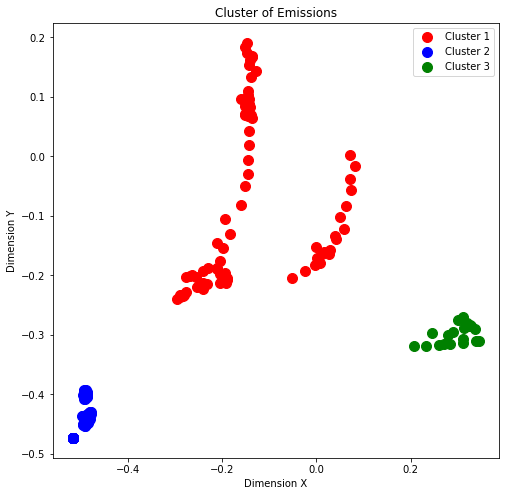

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X[y_dbscan==0,0], X[y_dbscan==0,1], s = 100, c= 'red' ,label = 'Cluster 1')
plt.scatter(X[y_dbscan==1,0], X[y_dbscan==1,1], s = 100, c= 'blue' ,label = 'Cluster 2')
plt.scatter(X[y_dbscan==2,0], X[y_dbscan==2,1], s = 100, c= 'green' ,label = 'Cluster 3')
# plt.scatter(X[y_dbscan==3,0], X[y_dbscan==3,1], s = 100, c= 'yellow' ,label = 'Cluster 4')
# plt.scatter(X[y_dbscan==4,0], X[y_dbscan==4,1], s = 100, c= 'cyan' ,label = 'Cluster 5')
# plt.scatter(X[y_dbscan==5,0], X[y_dbscan==5,1], s = 100, c= 'violet' ,label = 'Cluster 6')
# plt.scatter(X[y_dbscan==6,0], X[y_dbscan==6,1], s = 100, c= 'brown' ,label = 'Cluster 7')
plt.title('Cluster of Emissions')
plt.xlabel('Dimension X')
plt.ylabel('Dimension Y')
plt.legend()
plt.show()